IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_44876/1608348942.py:5: SyntaxWarning: invalid escape sequence '\,'
  "f_1 f_2 f_3 f_4 tau lambda varpi varpi_p gamma \\omega_{\\rm{ext}} \\omega_{\\rm{p\,ext}} theta Theta phi"


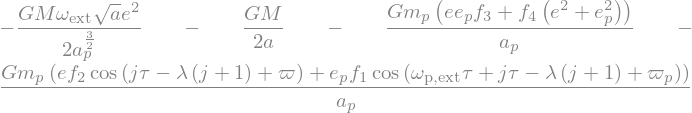

KeyboardInterrupt: 

KeyboardInterrupt: 

In [1]:
%run 'ER3BP Precession Dissipation.ipynb'

In [ ]:
qval = 4e-6

ps = {
    f1: f1val_outside,
    f2: f2val_outside,
    mu_p: qval,
    j: 2,
    Te: 1e3 * 2 * np.pi,
    Tm: 1e6 * 2 * np.pi,
    pom_p: np.pi,
}

H_eom = H_XYthTh

Xdot = plugin(H_eom.diff(Y) + Xdot_dis, ps)
Ydot = plugin(-H_eom.diff(X) + Ydot_dis, ps)
thdot = plugin(H_eom.diff(Th), ps)
Thdot = plugin(-H_eom.diff(th) + Thdot_dis, ps)
#display(Xdot, Ydot, thdot, Thdot)

Th_a = plugin(to_orbelts(coords_thTh[Th]), ps)
a_Th = plugin(to_orbelts(coords_thTh[L]), ps) ** 2
initVals = [0, 0, 0, Th_a.subs(a, 1.4)]

event1 = float(Th_a.subs(a, 1.2))
event2 = float(Th_a.subs(a, 2.))
tspan = (0, 2*np.pi * 1e6)
t_eval = np.linspace(tspan[0], tspan[1], 100000)


def f(t, Y):
    return Y[3] - event1


def fp(t, Y):
    return Y[3] - event2


f.terminal = True
fp.terminal = True

evs = [f, fp]

In [ ]:
ompv = 0
omval = 0
epv = 0.03
sol = solve_ivp([0,ompv,omval,epv,evs, lambda x: 1])

0


(10,)


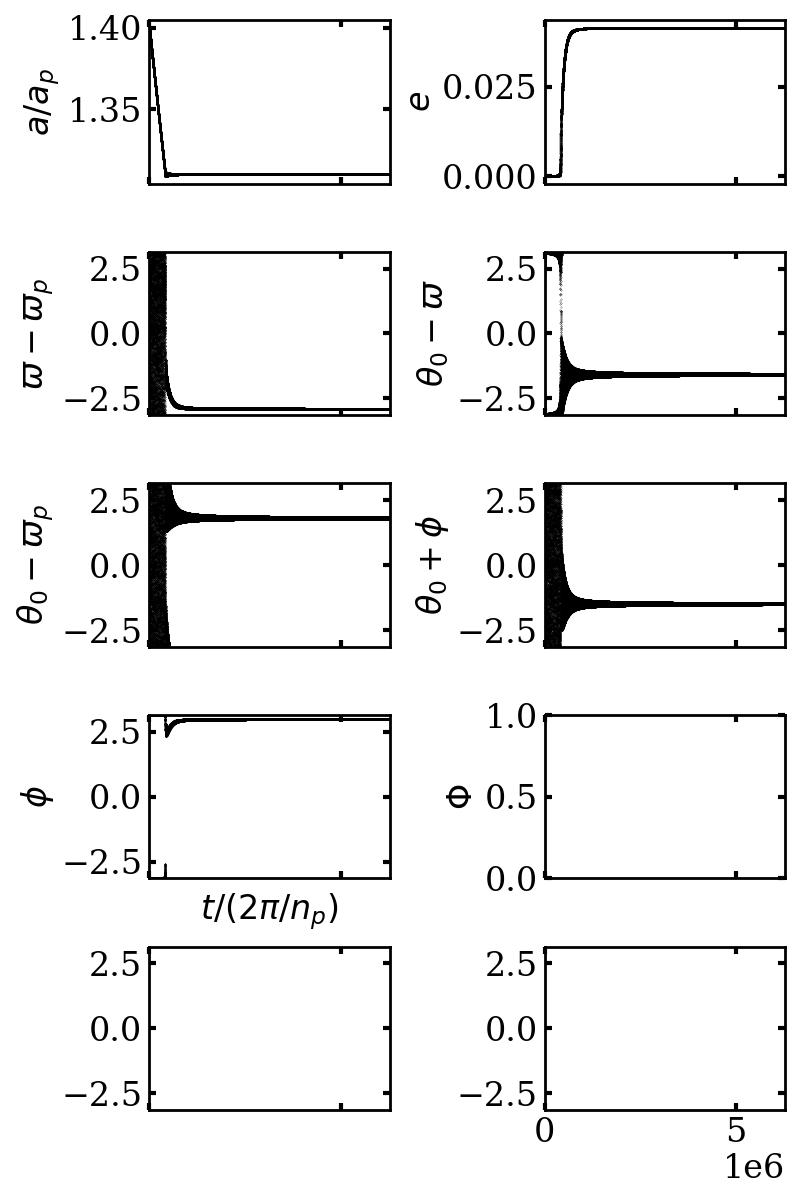

In [ ]:
plot(sol[0],[ompv,omval,epv,ps[mu_p],ps[Te],ps[Tm]])

In [ ]:
def plot(sol, params):
    ompval, omval, epval = params[0], params[1], params[2]
    qval, Teval, Tmval = params[3], params[4], params[5]
    mpl.rcParams["lines.markersize"] = 0.2
    with mpl.rc_context(analytic):
        fig, ax = plt.subplots(5, 2, figsize=(8, 12))
    ax = ax.flatten()
    print(ax.shape)
    fig.subplots_adjust(left=0.2)

    for ii,axis in enumerate(ax[2:]):
        if ii not in [5]:
            axis.set_ylim(-np.pi, np.pi)
    for axis in ax[:-1]:
        axis.xaxis.set_ticklabels([])
    for axis in ax:
        axis.set_xlim((sol["t"][0], sol["t"][-1]))

    # ax[0].twinx().scatter(sol["t"], (sol["a"])**(3/2),c="orange")
    th_0 = (sol["th"] - sol["pom"]) % (2 * np.pi)
    th_0 = th_0 - 2 * np.pi * (th_0 > np.pi)

    th_p = (sol["th"] - ompval * sol["t"]) % (2 * np.pi)
    th_p = th_p - 2 * np.pi * (th_p > np.pi)

    phi_int = np.arctan2(
        sol["a"] ** 0.25 * sol["e"] * np.sin(ompval * sol["t"] - sol["pom"]),
        sol["a"] ** 0.25 * sol["e"] * np.cos(ompval * sol["t"] - sol["pom"])
        + f1val_outside * alpha0val**0.25 * epval / f2val_outside,
    )

    thbar = (sol["th"] - ompval * sol["t"] + phi_int) % (2 * np.pi)
    thbar = thbar - 2 * np.pi * (thbar > np.pi)

    dpom = (sol["pom"] - ompval * sol["t"]) % (2 * np.pi)
    dpom = dpom - 2 * np.pi * (dpom > np.pi)


    ax[0].scatter(sol["t"], sol["a"], c="k")
    ax[1].scatter(sol["t"], sol["e"], c="k")
    ax[2].scatter(sol["t"], dpom, c="k")
    ax[3].scatter(sol["t"], th_0, c="k")
    ax[4].scatter(sol["t"], th_p, c="k")
    ax[5].scatter(sol["t"], thbar, c="k")
    ax[6].scatter(sol["t"], phi_int, c="k")

    ax[0].set_ylabel(r"$a/a_p$")
    ax[1].set_ylabel(r"$e$")
    ax[2].set_ylabel(r"$\varpi-\varpi_p$")
    ax[3].set_ylabel(r"$\theta_0 - \varpi$")
    ax[4].set_ylabel(r"$\theta_0 - \varpi_p$")
    ax[5].set_ylabel(r"$\theta_0 + \phi$")
    ax[6].set_ylabel(r"$\phi$")
    ax[7].set_ylabel(r"$\Phi$")

    # ax[6].ticklabel_format(axis="x", scilimits=(0, 0))

    ax[6].set_xlabel(r"$t/(2\pi/n_p)$")
    fig.tight_layout()